In [195]:
import pandas as pd
import numpy as np

In [8]:

data_ = pd.ExcelFile('/root/Work/cdc_project/UI Data/ui_data.xlsx')

information = data_.sheet_names  # see all sheet names


In [19]:
print(information[0])
# Let's see the first sheet
data_0 = data_.parse(information[0])  # read a specific sheet to DataFrame
data_0[data_0.columns[:4]].head()

Contents Tab


,Tab Name,Data Description,"(State,National) Data Available","Includes (Graph,Table)?"
0,Weekly Claims,"Weekly State and Federal UI, Initial and Conti...",National,"Table, Graph"
1,Paid Claims,Percent of Initial Claims that were Paid in Ma...,"State, National",Table
2,PUC Cut Off,Number of Workers Being Impacted by the Cut of...,"State, National","Table, Graph"
3,Nonmonetary Timeliness,"Average Time to Processing UI Initial Claims, ...",State,Table
4,Demographics,Demographics of UI Claimants (continued claims...,"State, National",Table


adasdasda

In [22]:
print(information[1])
# Let's see the first sheet
data_1 = data_.parse(information[1])  # read a specific sheet to DataFrame
data_1[data_0.columns].head()

Recipiency Data


,State,2021,Unnamed: 2
0,Alabama,26.4,2021-12-31
1,Alaska,49.7,2021-12-31
2,Arizona,19.5,2021-12-31
3,Arkansas,29.2,2021-12-31
4,California,41.2,2021-12-31


asasdasdasd

In [56]:
data_state = data_1.loc[range(0,52)][['State', 2021]]
data_state[2019] = data_1.loc[range(52,len(data_1))][2021].values
data_state.head()

,State,2021,2019
0,Alabama,26.4,23.151826
1,Alaska,49.7,32.037714
2,Arizona,19.5,13.237224
3,Arkansas,29.2,24.073570
4,California,41.2,40.164036


123131

In [83]:
data_WBA = data_.parse(information[2], header=None, names=['date', 'state', 'max_WBA']).iloc[:-1, :]
data_WBA.date = pd.to_datetime(data_WBA.date)
data_WBA.max_WBA = pd.to_numeric(data_WBA.max_WBA)
data_WBA.tail()

,date,state,max_WBA
2327,2021-07-01,Virginia,378
2328,2021-07-01,Washington,929
2329,2021-07-01,West Virginia,424
2330,2021-07-01,Wisconsin,370
2331,2021-07-01,Wyoming,533


<AxesSubplot:xlabel='date'>

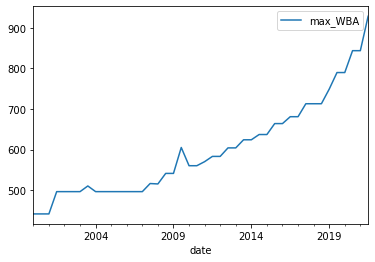

In [220]:
# we can track the changes in WBA by state
data_WBA_state = data_WBA.groupby('state')
data_WBA_state.get_group('Washington').plot(x='date', y='max_WBA')

<AxesSubplot:xlabel='date'>

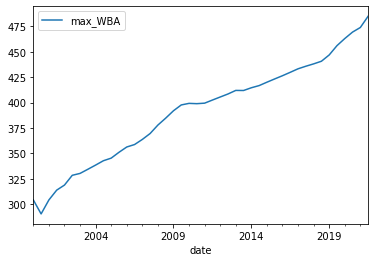

In [87]:
data_WBA.groupby('date').agg({'max_WBA': 'mean'}).plot()

asdasdasda

In [91]:
data_denial = data_.parse(information[3])
data_denial.head()

,State,2018,2019,2020,2021
0,AK,0.324,0.341,0.432,0.620
1,AL,0.480,0.478,0.532,0.851
2,AR,0.401,0.393,0.466,0.520
3,AZ,0.615,0.643,0.544,0.379
4,CA,0.261,0.259,0.236,0.168


asdadas

In [107]:
data_taxrate = data_.parse(information[4])
data_taxrate.Date = pd.to_datetime(data_taxrate.Date)
data_taxrate = data_taxrate.pivot('State', 'Date')
data_taxrate.head()

Average Tax Rate on Total Wages (%)                        \
Date                                2000-01-01 2001-01-01 2002-01-01   
State                                                                  
Alabama                                   0.34       0.39       0.41   
Alaska                                    1.75       1.64       1.58   
Arizona                                   0.29       0.23       0.21   
Arkansas                                  0.72       0.65       0.68   
California                                0.53       0.53       0.51   

                                                                              \
Date       2003-01-01 2004-01-01 2005-01-01 2006-01-01 2007-01-01 2008-01-01   
State                                                                          
Alabama          0.49       0.51       0.58       0.41       0.36        0.4   
Alaska           1.49       1.68       1.89       1.83       1.53        1.3   
Arizona          0.21       0.26       0.33       0.34       0.34        0.3   
Arkansas         0.86       0.92       0.91       0.86       0.76        0.8   
California       0.60       0.85       0.86       0.81       0.73        0.7   

                       ...                                              \
Date       2009-01-01  ... 2011-01-01 2012-01-01 2013-01-01 2014-01-01   
State                  ...                                               
Alabama           0.4  ...        0.9        0.7        0.6        0.5   
Alaska            1.1  ...        1.5        1.9        2.1        1.6   
Arizona           0.3  ...        0.4        0.5        0.5        0.5   
Arkansas          0.8  ...        1.2        1.2        1.1        1.0   
California        0.7  ...        0.9        0.8        0.8        0.8   

                                                                              
Date       2015-01-01 2016-01-01 2017-01-01 2018-01-01 2019-01-01 2020-01-01  
State                                                                         
Alabama           0.5        0.4        0.3        0.3        0.3        0.2  
Alaska            1.3        1.2        1.1        1.0        1.0        0.9  
Arizona           0.4        0.4        0.4        0.4        0.3        0.3  
Arkansas          0.9        0.7        0.6        0.4        0.4        0.2  
California        0.7        0.7        0.6        0.6        0.5        0.5  

[5 rows x 21 columns]

sadasda

In [111]:
data_paidclaims = data_.parse(information[5], header = 5)

data_paidclaims

,State,"Total New Initial Claims, March 2020 - July 2021","First Payments, March 20 - July 2021","Percent of Initial Claims That Have Been Paid, March 2020 - July 2021",Sorted by Percent of Initial Claims That Have Been Paid,State,"Percent of Initial Claims That Have Been Paid, March-November","First Payments, March","First Payments, April","First Payments, May","First Payments, June","First Payments, July","First Payments, August","First Payments, September","First Payments, October","First Payments, November"
0,Alabama,1155662.0,403246.0,0.3489,NaN,Minnesota,0.016467,6462.0,3186.0,988.0,546.0,481.0,298.0,219.0,196.0,268.0
1,Alaska,167621.0,85339.0,0.5091,NaN,Montana,0.064632,1678.0,1311.0,629.0,730.0,633.0,1124.0,359.0,341.0,927.0
2,Arizona,1146027.0,539196.0,0.4705,NaN,Georgia,0.314175,63320.0,447682.0,207520.0,112472.0,84596.0,27625.0,17844.0,16809.0,12220.0
3,Arkansas,441191.0,213764.0,0.4845,NaN,Oklahoma,0.387182,21261.0,113553.0,90418.0,69352.0,13039.0,8496.0,6291.0,5700.0,5000.0
4,California,7371366.0,5657829.0,0.7675,NaN,Washington,0.394305,56552.0,257741.0,78109.0,41110.0,47276.0,17394.0,12704.0,10252.0,13251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,NaN,NaN,NaN,NaN,May,5760517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,NaN,NaN,NaN,NaN,June,3163674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,NaN,NaN,NaN,NaN,July,2147689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,NaN,NaN,NaN,NaN,August,1440073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This one is too messy, I can just manually copy it over.

In [143]:
data_time_decide_info = data_.parse(information[6], header = None).iloc[[0,2, 58], 0]

for info in data_time_decide_info:
    print(info)
data_time_decide = data_.parse(information[6], skiprows=3, skipfooter=1)
data_time_decide = data_time_decide[data_time_decide.columns[2: 8]].rename(columns={'STATE.2':'State'})
data_time_decide.head()

How long does it take for states to decide unemployment cases? (separation issues, nonmonetary)
Updated: March 2 2021 | Data: January 1 - January 31, 2021
Source: U.S. Department of Labor Performance Data


,State,22-28 days,29-35 Days,36-42 Days,43-49 Days,> 50 days
0,Alabama,NaN,NaN,NaN,NaN,NaN
1,Alaska,0.016667,0.022396,0.041667,0.032292,0.845833
2,Arizona,0.152333,0.063070,0.027495,0.017331,0.065807
3,Arkansas,0.007624,0.005337,0.004574,0.006862,0.956544
4,California,0.090612,0.024490,0.002449,0.000816,0.007347


asdasdasdasd

In [219]:
state_list = list(data_.parse(information[7], skiprows=4)['Unnamed: 0'].values)[:54]
months = list(data_.parse(information[7], skiprows=4).columns)[1:11]

data_state_montly = pd.DataFrame({"state":state_list*len(months), "month":sum([[months[i]]*len(state_list) for i in range(len(months))], [])})
cols = [range(1, 11), range(12, 22), range(22, 32), range(32, 42), range(42, 50), range(50, 60)]
var_names = ['initial_claims', 'weeks_claimed', 'weeks_compensated', 'first_payment', 'partial_weeks', 'weekly_benefit_amounts' ]
for i in range(len(cols)):
    data_temp = data_.parse(information[7], skiprows=4, usecols=cols[i], nrows=len(state_list))
    if len(data_temp.columns) < len(months):
        for j in range(len(months) - len(data_temp.columns)):
            data_temp[f"dummy_{j}"] = np.nan
    data_state_montly[var_names[i]] = pd.melt(data_temp).value.values

data_state_montly

,state,month,initial_claims,weeks_claimed,weeks_compensated,first_payment,partial_weeks,weekly_benefit_amounts
0,Alabama,Jan,12918.0,69926.0,53716.0,5250.0,3179.0,NaN
1,Alaska,Jan,5105.0,39919.0,33608.0,2239.0,1725.0,NaN
2,Arizona,Jan,17551.0,66970.0,54980.0,4050.0,1312.0,NaN
3,Arkansas,Jan,8998.0,50154.0,34786.0,4332.0,4841.0,NaN
4,California,Jan,222158.0,1567289.0,1379887.0,102237.0,84738.0,NaN
...,...,...,...,...,...,...,...,...
535,Washington,October,76514.0,668560.0,554344.0,10252.0,NaN,435.66
536,West Virginia,October,8630.0,107932.0,101081.0,2823.0,NaN,251.12
537,Wisconsin,October,62178.0,416619.0,320774.0,10156.0,NaN,291.67
538,Wyoming,October,2750.0,24437.0,23461.0,834.0,NaN,436.29


asdasdasdada

In [236]:
data_weekly_benefit = data_.parse(information[8], skiprows=2)
data_weekly_benefit = data_weekly_benefit.melt(id_vars=['State']).rename(columns={'variable':'date', 'value':'weekly_benefit_amounts'})

asdaddasdasd

In [271]:
data_demographics_info = data_.parse(information[10], header=None).iloc[[0,1, 61, 62], 0]

for info in data_demographics_info:
    print(info)
data_demographics = data_.parse(information[10], skiprows=3, skipfooter=6,usecols=range(18))
col_names = {}
for col in data_demographics.columns[1:]:
    col_list = col.split('.')
    if len(col_list) == 1:
        col_names[col] = col_list[0] + " (Claimants)"
    elif col_list[1] == "1":
        col_names[col] = col_list[0] + " (Labor Force)"
    elif col_list[1] == "2":
        col_names[col] = col_list[0] + " (All Population)"
data_demographics.rename(columns=col_names, inplace=True)

data_demographics
# data_time_decide = data_time_decide[data_time_decide.columns[2: 8]].rename(columns={'STATE.2':'State'})
# data_time_decide.head()
# data_demographic

Demographics of UI Claimants - Average since March 2020
Updated: October 12, 2021 | Data through August 2021
ETA 203
https://drive.google.com/open?id=1OyBnaZzp6hewgPaIEsxarNqi7Lkehlxc


,State,Percent Black (Claimants),Percent White (Claimants),Percent Asian (Claimants),Percent N/A (Claimants),Percent Hispanic (Claimants),Percent Non-Hispanic (Claimants),Percent Women (Claimants),Percent Men (Claimants),Percent Black (Labor Force),Percent White (Claimants),Percent Hispanic (Labor Force),Percent Asian (Labor Force),Percent Women (Labor Force),Percent Hispanic (All Population),Percent White (Labor Force),Percent Black (All Population),Percent Asian (All Population)
0,Alabama,0.476,0.454,0.002,0.040,0.0153,0.9335,0.571,0.429,0.248785,0.713654,0.046399,NaN,0.472382,0.053,0.631,0.256,0.015
1,Alaska,0.050,0.532,0.081,0.061,0.0002,0.9389,0.477,0.523,0.037681,0.655072,0.060870,8.1%*,0.460870,0.068,0.575,0.028,0.059
2,Arizona,0.092,0.577,0.039,0.230,0.3394,0.5077,0.513,0.487,0.049097,0.835497,0.321670,4.3%*,0.468115,0.307,0.534,0.044,0.035
3,Arkansas,0.279,0.560,0.002,0.089,0.0109,0.9112,0.557,0.443,0.145985,0.818978,0.085401,NaN,0.473723,0.085,0.685,0.149,0.017
4,California,0.077,0.301,0.154,0.461,0.3790,0.5394,0.521,0.479,0.061230,0.723591,0.372421,16.2%*,0.454129,0.394,0.347,0.054,0.151
5,Colorado,0.083,0.704,0.037,0.151,0.2008,0.7095,0.503,0.497,0.042303,0.890267,0.214059,NaN,0.458969,0.219,0.651,0.038,0.034
6,Connecticut,0.150,0.553,0.037,0.256,0.1871,0.8129,0.552,0.448,0.112794,0.809399,0.148825,4.8%*,0.482507,0.173,0.632,0.100,0.047
7,Delaware,0.404,0.519,0.024,0.046,0.1051,0.8303,0.533,0.467,0.218367,0.708163,0.081633,5.2%*,0.487755,0.105,0.586,0.215,0.043
8,District of Columbia,0.559,0.231,0.057,0.143,0.1595,0.8344,0.540,0.460,0.361650,0.555825,0.099515,5.9%*,0.512136,0.113,0.380,0.409,0.048
9,Florida,0.159,0.454,0.021,0.349,0.2338,0.4469,0.551,0.449,0.168582,0.772328,0.281838,3.2%*,0.471082,0.265,0.515,0.145,0.029
